Adam Peetz<br>
MSDS650 Week4 Assignment<br>
Regis University<br>

# Hypothesis Testing: Tooth Supplement Database


In [2]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_1samp

%matplotlib inline
sns.set()  

In [3]:
# load DF
tooth_df = pd.read_csv('assign_wk4/ToothGrowth.csv', low_memory=False)

In [4]:
#sample DF
tooth_df.head(6)

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5


In [5]:
#sample df
tooth_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,60.0,30.500000,17.464249,1.0,15.750,30.50,45.250,60.0
len,60.0,18.813333,7.649315,4.2,13.075,19.25,25.275,33.9
dose,60.0,1.166667,0.628872,0.5,0.500,1.00,2.000,2.0


# Graphically Describe the Dataset

The tooth dataset contains 60 total observations. 30 for Vitamin C exposure, marked by VC, and 30 for Orange Juice exposure, marked by OJ in the dataset. 

<b>Requirement: Graphically describe dataset with a plot.</b><br>
With two distinct subject groups, this dataset can be succinctly summarized by a hued joint plot:

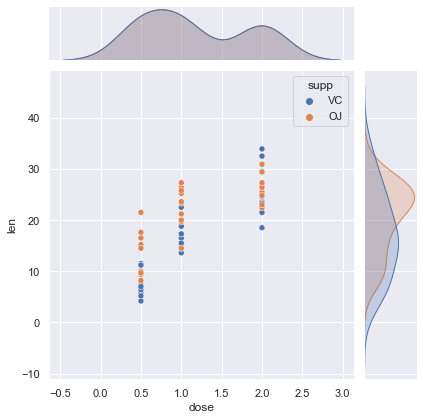

In [7]:
#create jointplot
sns.jointplot(x='dose',y='len',data=tooth_df,hue='supp')

<b>Requirement: Summarize findings</b><br>

A joint plot shows the relationship between two variables. There are a couple of elements shown in tandem here. First, the distribution of the x and y variables is shown on their opposing axis. Between these, a scatterplot is shown to place the elements in space on a chart. The points in the scatterplot have been colored in this example based on the variable "supplement type". This highlights the difference between exposure groups in a dataset. Vitamin C is represented by blue in the graph, and Orange Juice is orange. <br>

Tooth growth appears to be related to the amount of both VC and OJ the subjects are given. With higher doses resulting in longer teeth. The maximum observed tooth length came from a Vitamin C subject with a tooth length of 33.9 cm. The smallest tooth growth of 4.2 was also a result of Vitamin C exposure. On average, subjects in the trail experienced a growth of about 19 mm. <br>

A clear spike is shown for the distribution of orange juice above that of vitamin C in the joint plot. The distribution of vitamin C has much longer tails. <br>

### Requirement: Graphical check for normality:</b>

The joint plot can be used to check the distribution of the data for normality, as shown on the opposing axis. These distributions do not pass a graphical check for normality. (Chetty, 2021) 
- Dose has a clear hole in the distribution at the 1.5mg exposure strength, causing two humps to appear instead of one.
- The distribution of length is skewed to the left.  
    - The joint plot shows that this is due to a spike caused by Orange juice exposure around 25mm in  length. 
    - The combined distribution for length, shown below in a violin plot, visualizes the skew in the data.


<AxesSubplot:xlabel='len'>

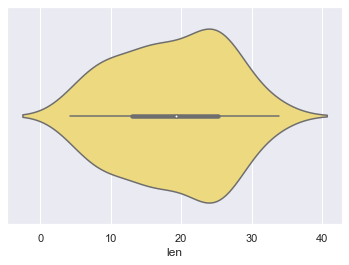

In [6]:
#graphical check for normality: combined distribution of length
sns.violinplot(data=tooth_df,x='len',color="#FFE56E", hue='supp')

### Requirement: Statistical test for normality</b>

Skewness is a statistical measure for the slant of information between -1 and 1. A positive skew indicates data slants to the right. A negative skew represents data trending toward the left. A skew of 0 would represent data in perfect balance. This measure can be calculated in pandas by calling .skew() for a feature in the data frame.(Ranjan, 2021)
- The skew for dose is 0.39. This indicates a skew to the right, which is supported by the graphical check that showed a hole in the data around the 1.5mg exposure amount.

Kurtosis is a statistical measure of the fatness of tails. A positive kurtosis indicates narrow tails. A negative kurtosis indicates thick tails. This measure can be calculated in pandas by calling. kurt() on a feature in the data frame. (corporatefinanceinstitute.com, 2021)
- The kurtosis for length is -0.95, the length variable will have thicker than normal tails.
- The kurtosis for dose is -1.52, dose will have thicker than normal tails. 

Length and dose both fail statistical checks for normality. The closest a distribution comes to normal is on the skewness test for length, with a value of -0.14.


In [7]:
#calculate and display statistical tests
print('Length Variable Normality:')
print('Skewness',tooth_df['len'].skew())
print('Kurtosis',tooth_df['len'].kurt())
print('Dose Variable Normality:')
print('Skewness:',tooth_df['dose'].skew())
print('Kurtosis:',tooth_df['dose'].kurt())

Length Variable Normality:
Skewness -0.14995189829252065
Kurtosis -0.9549824842435792
Dose Variable Normality:
Skewness: 0.391662128341854
Kurtosis: -1.5258620689655167


### Requirement: Define a null and alternative hypothesis #1</b>

Let’s test the assumption higher doses result in longer teeth. This trend is displayed by the upward curve in length exposed earlier in our graphical analysis. As subjects are exposed to higher levels of supplement, they grow longer teeth. However, all subjects experienced growth. Is the growth of the 2mg subjects significant compared to the rest?  <br>

Null Hypothesis:<br>
There is no difference in tooth growth between dose groups<br>
- mean all benefits = mean 2mg benefits

Alternative Hypothesis:<br>
If subjects are given 2 mg of supplement, then they will have longer tooth growth than all subjects given supplement. <br>
- mean 2 mg benefits > mean all benefits


<b>Requirement: Hypothesis Testing</b>

Type: Single Sample T-Test

<b>Requirement: Explain why you chose the test(s) you are using</b>

A single sample t-test can be used to test the difference between a known mean and a sample. With it we can compare the mean growth of all subjects (18.8mm) to the mean growth of subjects given 2mg of supplement(26.1mm). A single sample t-test can be ran using pythons SciPy library. The following example has been developed from code in this week’s required reading. <br>


In [8]:
#filter for two milligram exposure
two_df = tooth_df[tooth_df['dose']==2.0]

In [9]:
#test for significance in two milligram group length against sample mean 18.8
tset, pval = ttest_1samp(two_df['len'], 18.8)
print(f'p-value: {pval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 5.153193492737563e-08
Reject null hypothesis


<b>Requirement: Summarize your findings</b>

A P value of 0.00000005, basically 0, is an indication to reject the null hypothesis. The 2mg group is absolutely seeing longer growth due to their higher exposure.

<b>Requirement: Conclusion </b>

The upward trend originally identified in the graphical analysis is a result of higher exposure to Vitamin C and Orange Juice. While all subjects in the dataset experienced tooth growth, the subjects given 2mg had higher growth than the population as a whole. The difference is large enough to be statistically significant. The distribution for all three groups is shown below.  <br>


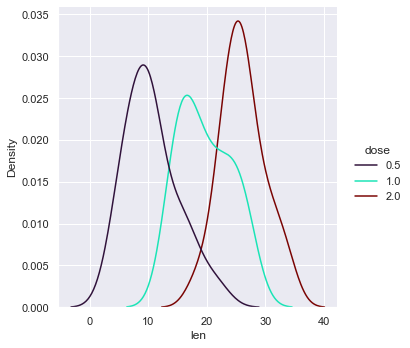

In [10]:
#show distribution divided by dose
sns.displot(tooth_df,x='len',hue='dose',kind='kde',palette='turbo')

### Requirement: Refine a null and alternative hypothesis #2

Next, let’s explore the difference between Vitamin C and Orange Juice as a supplement using a two tailed test.

Null Hypothesis:<br>
There is no difference in tooth growth between subject groups given Vitamin C and Orange Juice. <br>
- mean vitamin c benefits = mean orange juice benefits

Alternative Hypothesis:<br>
If subjects are given orange juice they will have longer tooth growth than subjects given Vitamin C.<br>
- mean vitamin c benefits < mean orange juice benefits



<b>Requirement: Hypothesis Testing</b>

Type: Two Sample T-Test

<b>Requirement: Explain why you chose the test(s) you are using</b>

A two-sample t-test can be used to determine if there is a significant difference between two means. It will be used here to see if there is in fact an observed effectiveness in vitamin C vs orange juice. There is a possibility we are seeing a spike because the samples we have are misrepresenting the population as whole. A two-sample t-test can be ran in python using the SciPy stats library. The following code has been adapted from this weeks required reading for results filtered by supplement type.<br>


In [14]:
#filter df by supplement type
vc_df = tooth_df[tooth_df['supp']=='VC']
oj_df = tooth_df[tooth_df['supp']=='OJ']

In [15]:
#paired t-test
twosampttest,twosamppval = stats.ttest_rel(vc_df['len'], oj_df['len'])
print(f'p-value: {twosamppval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p-value: 0.0025498424133060605
Reject null hypothesis


<b>Requirement: Summarize findings</b>

The P value of the two sample t-test is 0.002. This is far below the 5% and even 1% significance thresholds. A low p-value is a signal to reject the null hypothesis. There is no possibility the mean of the orange juice and vitamin C groups are this different by chance. 


<b>Requirement: Conclusion</b>

The orange spike originally seen during the joint plot visualization and shown below did not occur by chance. Our alternative hypothesis: that subjects given orange will have longer tooth growth, was proved by two sample t-test. There is in fact a benefit to using orange juice over vitamin C as a tooth growth supplement.



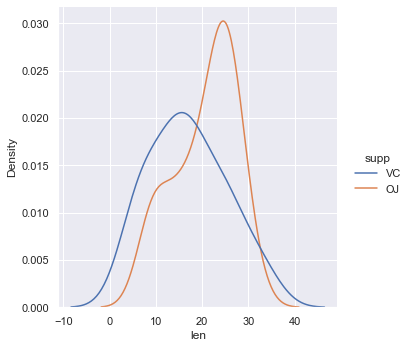

In [16]:
# illustrate proven tooth growth benefits.
sns.displot(tooth_df,x='len',hue='supp',kind='kde')

# References:

> Chetty, Priya. 2021. <i> How to Graphically Test Normality. </i> retreived from projectguru.com.<br>
> https://www.projectguru.in/how-to-graphically-test-normality/

> corporatefinanceinstitute.com. 2021. <i>Kurtosis</i> retreived from corporatefinanceinstute.com<br>
> https://corporatefinanceinstitute.com/resources/knowledge/other/kurtosis/

> Ranjan, Shubham. 2021 <i>Python | Pandas dataframe.skew()</i> retreived from geeksforgeeks.com<br>
> https://www.geeksforgeeks.org/python-pandas-dataframe-skew/